<a href="https://colab.research.google.com/github/Tahagho82/Classifying-Flowers-with-CNN/blob/main/Classifying_Flowers_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### In this section, we classify the categorical flower using the CNN model.

## Let's go.😉😉

In [ ]:
# Import modules

import tensorflow_datasets as tfds
import tensorflow as tf
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import zipfile
import random
import os

## Download and view the data from Kaggle.

In [ ]:
!kaggle datasets download -d lara311/flowers-five-classes

Dataset URL: https://www.kaggle.com/datasets/lara311/flowers-five-classes
License(s): apache-2.0
 98% 155M/158M [00:05<00:00, 35.2MB/s]
100% 158M/158M [00:06<00:00, 27.5MB/s]


In [ ]:
zip_ref = zipfile.ZipFile('/content/flowers-five-classes.zip')
zip_ref.extractall()
zip_ref.close()

In [ ]:
random.choice(os.listdir("/content/train/dandelion"))

'9188647508_3b56e62f69.jpg'

In [ ]:
def show_random_images(dir):
  random_class = random.choice(os.listdir(dir))
  random_img = random.choice(os.listdir(dir + '/' + random_class))

  random_img_path = os.path.join(dir,random_class,random_img)

  img = mpimg.imread(random_img_path)

  plt.imshow(img)
  plt.title(random_class)
  plt.axis(False)

  return img


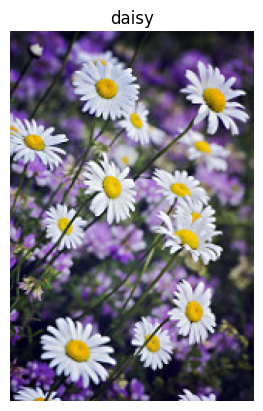

In [ ]:
img = show_random_images('/content/train')

In [ ]:
img.shape

(240, 158, 3)

## Preprocess the data

In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory


batch_size = 32
image_size = (128,128)
diractory = '/content/train'

train_data = image_dataset_from_directory(diractory,
                                          validation_split =0.2,
                                          image_size = image_size,
                                          seed=42,
                                          subset='training',
                                          batch_size=batch_size)
validation_data = image_dataset_from_directory(diractory,
                                               validation_split=0.2,
                                               image_size=image_size,
                                               seed=42,
                                               subset='validation',
                                               batch_size = batch_size)



Found 2746 files belonging to 5 classes.
Using 2197 files for training.
Found 2746 files belonging to 5 classes.
Using 549 files for validation.


## Visualize the Data 👀👀

In [ ]:
train_data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [ ]:
class_names = train_data.class_names
class_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [ ]:
len(train_data)

69

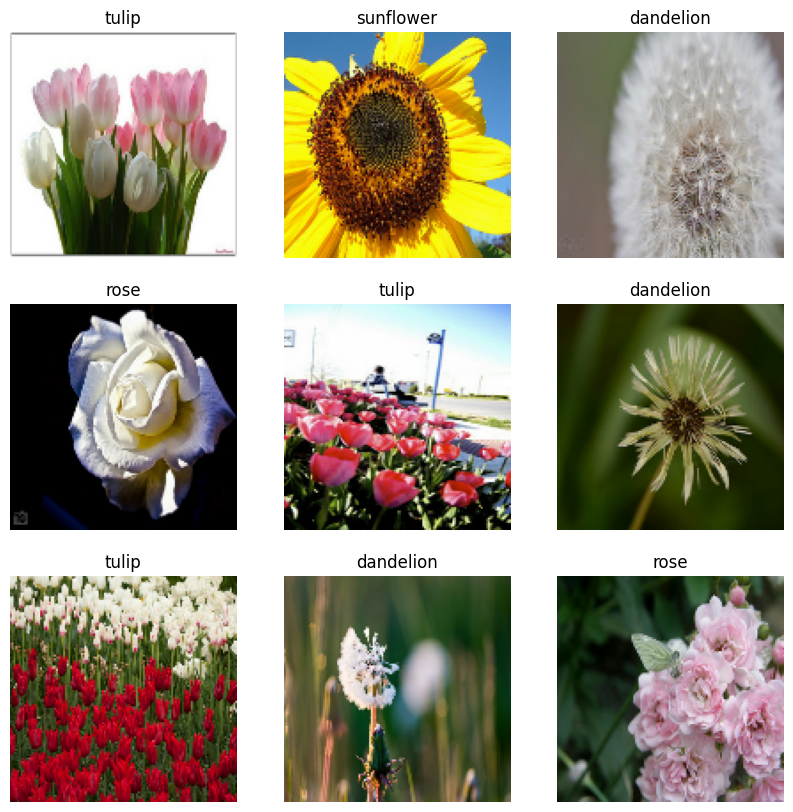

In [ ]:
plt.figure(figsize=(10,10))

for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis(False)

## Build our CNN model💻

In [ ]:
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Rescaling(1/255.),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),

    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.MaxPool2D(),


    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(len(train_data.class_names),
                          activation='softmax')

])


model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = ['accuracy'])

history = model.fit(train_data,
                    epochs=5,
                    validation_data=validation_data)

Epoch 1/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 55s 741ms/step - accuracy: 0.2799 - loss: 1.5107 - val_accuracy: 0.4208 - val_loss: 1.3149
Epoch 2/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 81s 735ms/step - accuracy: 0.3931 - loss: 1.3301 - val_accuracy: 0.5191 - val_loss: 1.2459
Epoch 3/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 82s 738ms/step - accuracy: 0.4819 - loss: 1.2516 - val_accuracy: 0.5756 - val_loss: 1.1413
Epoch 4/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 83s 750ms/step - accuracy: 0.5644 - loss: 1.1107 - val_accuracy: 0.6120 - val_loss: 1.0662
Epoch 5/5
69/69 ━━━━━━━━━━━━━━━━━━━━ 51s 737ms/step - accuracy: 0.6095 - loss: 1.0232 - val_accuracy: 0.6175 - val_loss: 1.0143


## Model Evaluation with Chart and Image📈

<Axes: >

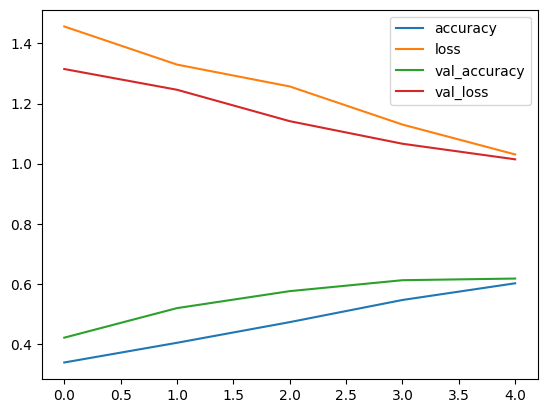

In [ ]:
pd.DataFrame(history.history).plot()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


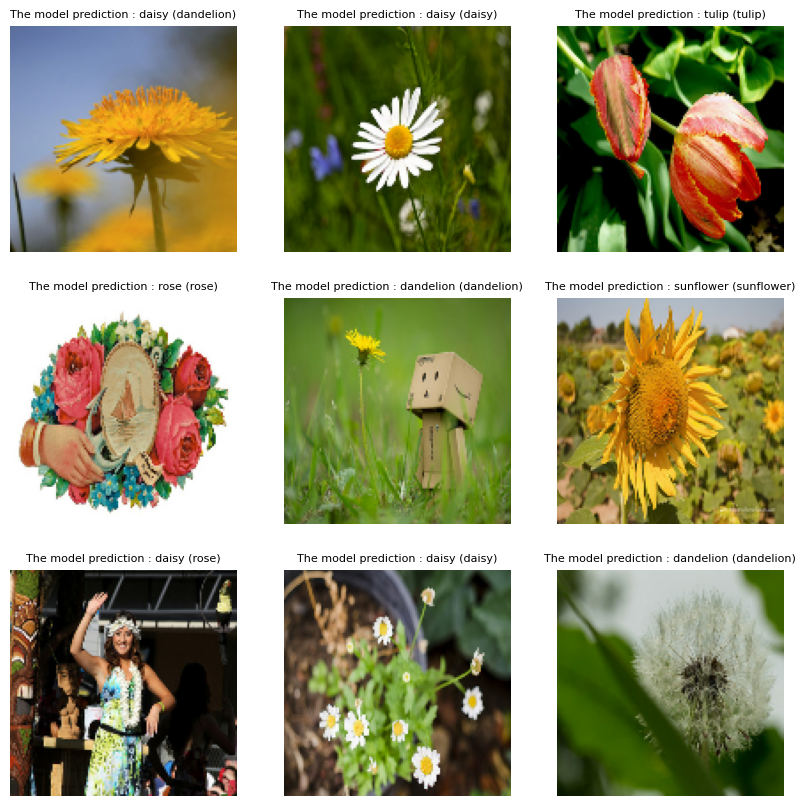

In [256]:
image_batch, label_batch = next(iter(validation_data))

plt.figure(figsize=(10, 10))
for i in range(9):
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image_batch[i].numpy().astype("uint8"))
  prob = model.predict(tf.expand_dims(image_batch[i].numpy().astype("uint8"),axis=0))
  pred = tf.argmax(prob[0])
  label = label_batch[i]
  plt.title(f'The model prediction : {class_names[pred]} ({class_names[label]})',fontsize=8)
  plt.axis("off")

ANNNDD DONEEE